In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
import sys
sys.path.append(os.path.abspath("../../../../"))
import Constants as c
import Utilities as utils

In [2]:

# file_line = "h3_metrics_h1_DT_05_29_2020.csv"
file_line = "../../05_30_2020/model_performance_results.csv"

df = pd.read_csv(file_line)

print(len(df))
# df = utils.remove_outlier(df, c.MAE)
# df.dropna(subset=[c.PRED_25], inplace=True)
# df.dropna(subset=[c.PRED_50], inplace=True)

# df.where(df[c.T_RECORDS] > 2, inplace = True)
# df.where(df[c.P_NA] <= .75, inplace = True)
# df.dropna()

print(len(df))

3456
3456


In [3]:
def print_is_gaussian(sample, pred, task_type, alpha):
    print("\nGaussian test for {0}:\n".format(task_type))
    utils.gaussian_test(sample[pred], alpha)

In [4]:
def print_std(sample, pred, task_type):
    print("{0} sample std: {1}".format(task_type, round(sample[pred].std(), 2)))

In [5]:
def print_median(sample, pred, task_type):
    print("{0} sample median: {1}".format(task_type, round(sample[pred].median(), 2)))

In [6]:
def get_task_sample(df, task_type, sample_size):
    filtered_by_task = df[df[c.TASK] == task_type]
    filtered_by_outliers = utils.remove_outlier(filtered_by_task, c.MAE)
    sample = filtered_by_outliers.sample(n=sample_size, random_state=0)
    return sample

In [7]:
def hypothesisTest_Effort(model_records, model, pred, sample_size):
    print("H3 test for {0}:".format(model))
    
    if model == c.MODULE:
        filter1 = model_records[c.MODEL] == c.MODULE_CC
        filter2 = model_records[c.MODEL] == c.MODULE_EC
    else:
        filter1 = model_records[c.MODEL] == c.LINE_CC
        filter2 = model_records[c.MODEL] == c.LINE_EC

    # s1_filter = (model_records[c.MODEL] == model)
    filter = (filter1 | filter2)
    model_records = model_records[filter]

    s1 = get_task_sample(model_records, "BUG", sample_size)
    s2 = get_task_sample(model_records, "DOCS", sample_size)
    s3 = get_task_sample(model_records, "REFACTOR", sample_size)
    s4 = get_task_sample(model_records, "TESTING", sample_size)
    s5 = get_task_sample(model_records, "FEATURE", sample_size)
    s6 = get_task_sample(model_records, "UPGRADE", sample_size)
    s7 = get_task_sample(model_records, "RELEASE", sample_size)
    s8 = get_task_sample(model_records, "SUPPORT", sample_size)
    s9 = get_task_sample(model_records, "OTHER", sample_size)

    num_records = len(s1)

    print("Number of records: {:.2f}".format(num_records))

    alpha = 0.05

    samples = [s1, s2, s3, s4, s5, s6, s7, s8, s9]

    for s in samples:
        print_median(s, pred, s.Task.values[0])

    for s in samples:
        print_std(s, pred, s.Task.values[0])
    
    for s in samples:
        print_is_gaussian(s, pred, s.Task.values[0], alpha)


    utils.multi_sample_rank_test(s1[pred], s2[pred], s3[pred], s4[pred], s5[pred], s6[pred], s7[pred], s8[pred], s9[pred], alpha)

    fig = plt.figure(figsize=(10,5))
    plt.tight_layout()
    sb.set(style="dark", palette="pastel")
    ax = sb.boxplot(x=c.TASK, y=c.PRED_25, data=model_records)
    ax.set_title('PRED25 Distributions for {0}'.format(model))
    sb.despine(offset=10, trim=True)
    plt.show()

In [8]:
sample_size = 40

H3 test for Module:
Number of records: 40.00
BUG sample median: 0.92
DOCS sample median: 0.98
REFACTOR sample median: 0.99
TESTING sample median: 0.94
FEATURE sample median: 0.99
UPGRADE sample median: 0.98
RELEASE sample median: 1.0
SUPPORT sample median: 0.98
OTHER sample median: 0.88
BUG sample std: 0.1
DOCS sample std: 0.05
REFACTOR sample std: 0.04
TESTING sample std: 0.09
FEATURE sample std: 0.03
UPGRADE sample std: 0.04
RELEASE sample std: 0.03
SUPPORT sample std: 0.04
OTHER sample std: 0.19

Gaussian test for BUG:

Shapiro p-value:  1.8094149709213525e-05
Shapiro Test: Sample does not look Gaussian (reject H0)

Gaussian test for DOCS:

Shapiro p-value:  1.171625899587525e-05
Shapiro Test: Sample does not look Gaussian (reject H0)

Gaussian test for REFACTOR:

Shapiro p-value:  3.0399343131648493e-07
Shapiro Test: Sample does not look Gaussian (reject H0)

Gaussian test for TESTING:

Shapiro p-value:  6.148124676030875e-09
Shapiro Test: Sample does not look Gaussian (reject H0)


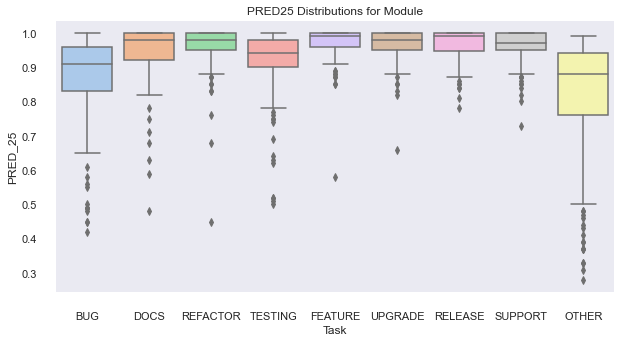

In [9]:
hypothesisTest_Effort(df.copy(), c.MODULE, c.PRED_25, sample_size)

H3 test for Line:
Number of records: 40.00
BUG sample median: 0.88
DOCS sample median: 0.98
REFACTOR sample median: 0.98
TESTING sample median: 0.92
FEATURE sample median: 0.98
UPGRADE sample median: 0.99
RELEASE sample median: 1.0
SUPPORT sample median: 0.96
OTHER sample median: 0.8
BUG sample std: 0.11
DOCS sample std: 0.06
REFACTOR sample std: 0.04
TESTING sample std: 0.13
FEATURE sample std: 0.04
UPGRADE sample std: 0.05
RELEASE sample std: 0.05
SUPPORT sample std: 0.05
OTHER sample std: 0.2

Gaussian test for BUG:

Shapiro p-value:  0.005809712689369917
Shapiro Test: Sample does not look Gaussian (reject H0)

Gaussian test for DOCS:

Shapiro p-value:  4.721533969131997e-06
Shapiro Test: Sample does not look Gaussian (reject H0)

Gaussian test for REFACTOR:

Shapiro p-value:  9.143598435912281e-05
Shapiro Test: Sample does not look Gaussian (reject H0)

Gaussian test for TESTING:

Shapiro p-value:  2.662006011178164e-07
Shapiro Test: Sample does not look Gaussian (reject H0)

Gauss

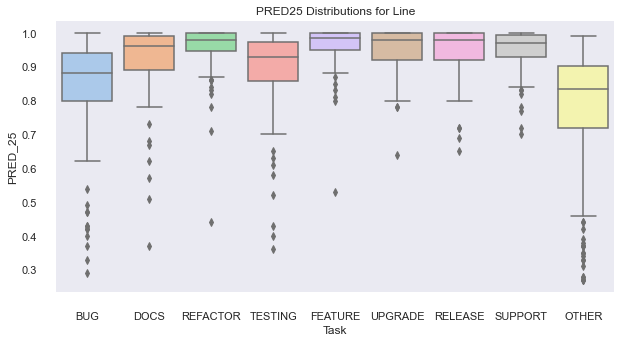

In [10]:
hypothesisTest_Effort(df.copy(), c.LINE, c.PRED_25, sample_size)